In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset directly from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['ID', 'Diagnosis', 'Radius_Mean', 'Texture_Mean', 'Perimeter_Mean', 'Area_Mean', 'Smoothness_Mean',
           'Compactness_Mean', 'Concavity_Mean', 'Concave_Points_Mean', 'Symmetry_Mean', 'Fractal_Dimension_Mean',
           'Radius_SE', 'Texture_SE', 'Perimeter_SE', 'Area_SE', 'Smoothness_SE', 'Compactness_SE',
           'Concavity_SE', 'Concave_Points_SE', 'Symmetry_SE', 'Fractal_Dimension_SE',
           'Radius_Worst', 'Texture_Worst', 'Perimeter_Worst', 'Area_Worst', 'Smoothness_Worst',
           'Compactness_Worst', 'Concavity_Worst', 'Concave_Points_Worst', 'Symmetry_Worst',
           'Fractal_Dimension_Worst']  # Appropriate column names as per dataset description

# Load the data
data = pd.read_csv(url, header=None, names=columns)

# Drop the ID column as it's not useful for analysis
data = data.drop('ID', axis=1)

# Convert Diagnosis column to binary (M=1, B=0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Show first few rows of the data
print(data.head())



   Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   Symmetry_Mean  ...  Radius_Worst  Texture_Worst  Perimeter_Worst  \
0         0.2419  ...         25.38          

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split


# Assuming 'data' is your DataFrame from the previous cell
X = data.drop('Diagnosis', axis=1)  # Features
y = data['Diagnosis']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.956140350877193


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



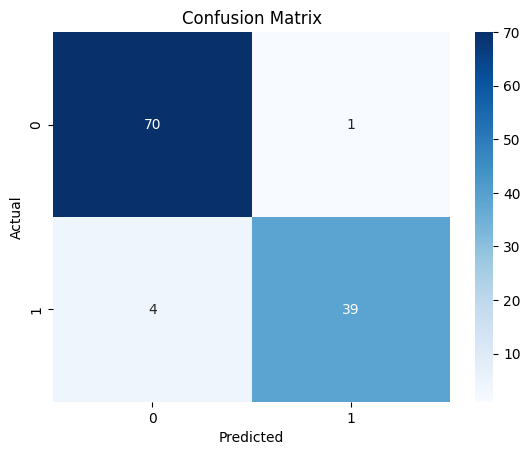

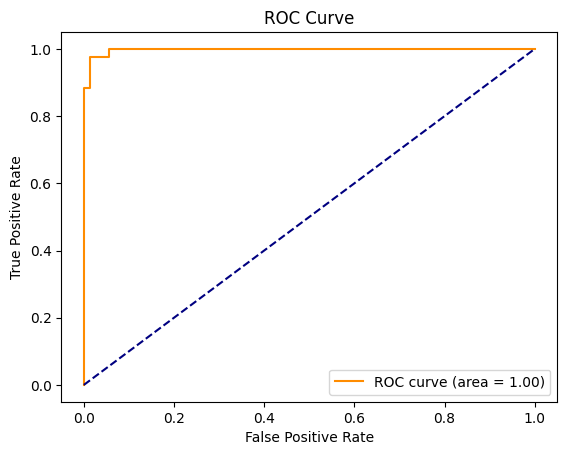

ROC-AUC Score: 0.99737962659679


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'ROC-AUC Score: {roc_auc}')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')

# Re-evaluate with the best model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {accuracy_tuned}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9626373626373628
Tuned Model Accuracy: 0.956140350877193


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Feature Importance (Coefficients):
                    Feature  Coefficient
26          Concavity_Worst     3.139250
28           Symmetry_Worst     2.330686
25        Compactness_Worst     2.187035
27     Concave_Points_Worst     1.811278
6            Concavity_Mean     1.482625
7       Concave_Points_Mean     1.078275
12             Perimeter_SE     0.921298
24         Smoothness_Worst     0.907338
5          Compactness_Mean     0.793738
8             Symmetry_Mean     0.656877
21            Texture_Worst     0.655921
4           Smoothness_Mean     0.478001
2            Perimeter_Mean     0.470899
10                Radius_SE     0.285173
29  Fractal_Dimension_Worst     0.170455
17        Concave_Points_SE     0.090942
18              Symmetry_SE     0.080558
13                  Area_SE     0.072971
14            Smoothness_SE     0.063192
9    Fractal_Dimension_Mean     0.031243
23               Area_Worst     0.027929
3                 Area_Mean     0.007424
19     Fractal_Dimensi

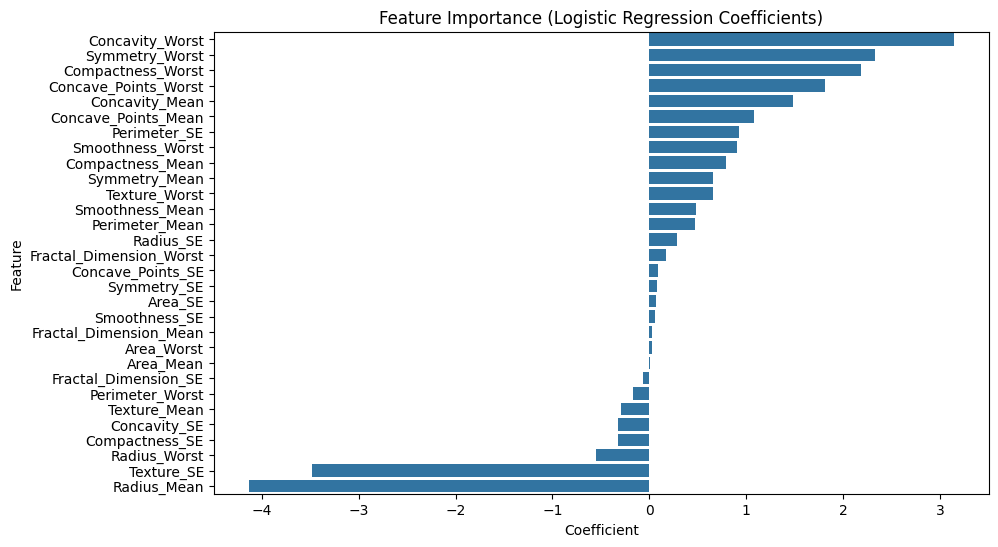

In [ ]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Coefficients):")
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()
